In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

In [2]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
#print(boston_dataset.DESCR)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
#Load the data and divide into X and Y varaiable
boston_pd = pd.DataFrame(boston_dataset.data) 
boston_pd.columns = boston_dataset.feature_names 
boston_pd_target = np.asarray(boston_dataset.target) 
boston_pd['House Price'] = pd.Series(boston_pd_target) 

# input 
X = boston_pd.iloc[:, :-1] 

#output 
Y = boston_pd.iloc[:, -1] 

print(boston_pd.head()) 


      CRIM    ZN  INDUS  CHAS  ...  PTRATIO       B  LSTAT  House Price
0  0.00632  18.0   2.31   0.0  ...     15.3  396.90   4.98         24.0
1  0.02731   0.0   7.07   0.0  ...     17.8  396.90   9.14         21.6
2  0.02729   0.0   7.07   0.0  ...     17.8  392.83   4.03         34.7
3  0.03237   0.0   2.18   0.0  ...     18.7  394.63   2.94         33.4
4  0.06905   0.0   2.18   0.0  ...     18.7  396.90   5.33         36.2

[5 rows x 14 columns]


In [4]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
x_train, x_test, y_train, y_test = train_test_split(boston_pd.iloc[:, :-1],
                                                    boston_pd.iloc[:, -1],
                                                    test_size=0.25)

(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((379, 13), (379,), (127, 13), (127,))

In [6]:
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 

# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test) 

# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 

# Putting together the coefficient and their corrsponding variable names 
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = x_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
print(lreg_coefficient) 


Mean squared Error on test set :  24.703862299894897
    Columns  Coefficient Estimate
0      CRIM             -0.130073
1        ZN              0.047717
2     INDUS             -0.015757
3      CHAS              2.917075
4       NOX            -14.686886
5        RM              3.682904
6       AGE             -0.009979
7       DIS             -1.480804
8       RAD              0.289268
9       TAX             -0.011697
10  PTRATIO             -0.854644
11        B              0.007922
12    LSTAT             -0.544543


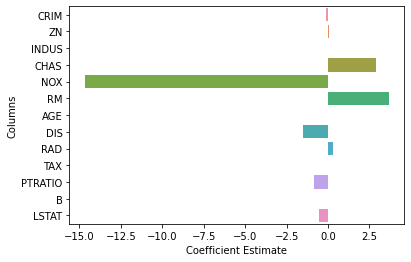

In [7]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient)

In [9]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 1) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 

25.290375370752614
    Columns  Coefficient Estimate
0      CRIM             -0.128281
1        ZN              0.048129
2     INDUS             -0.046006
3      CHAS              2.780453
4       NOX             -8.229476
5        RM              3.747671
6       AGE             -0.015297
7       DIS             -1.382489
8       RAD              0.276763
9       TAX             -0.012118
10  PTRATIO             -0.782006
11        B              0.008172
12    LSTAT             -0.554480


#### # import Lasso regression from sklearn library 



In [10]:
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = 1) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 
lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 

Mean squared error on test set 31.182365001645874
    Columns  Coefficient Estimate
0      CRIM             -0.081971
1        ZN              0.045359
2     INDUS             -0.011316
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              0.936229
6       AGE              0.010251
7       DIS             -0.593904
8       RAD              0.254951
9       TAX             -0.014991
10  PTRATIO             -0.643540
11        B              0.006251
12    LSTAT             -0.752542


In [11]:
# import model 
from sklearn.linear_model import ElasticNet 

# Train the model 
e_net = ElasticNet(alpha = .4,l1_ratio=.5) 
e_net.fit(x_train, y_train) 

# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 


Mean Squared Error on test set 27.9468274214667


,Columns,Coefficient Estimate
0,CRIM,-0.116994
1,ZN,0.052236
2,INDUS,-0.071344
3,CHAS,0.000000
4,NOX,-0.000000
5,RM,1.943173
6,AGE,-0.001038
7,DIS,-1.044149
8,RAD,0.297894
9,TAX,-0.015158
